In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

from scipy.stats import poisson, binom

## Global user settings

In [2]:
N_MONTHS = 36
LAT1 = 37.02606
LAT2 = 37.01025

LONG1 = -8.01873
LONG2 = -7.99163

In [3]:
data_raw_path = os.path.join(os.getcwd(), '../data-raw')
os.listdir(data_raw_path)

['quadrats.xlsx',
 'rf_s_q1.csv',
 'rf_s_q2.csv',
 'rf_w_q1.csv',
 'rf_w_q2.csv',
 'Ria de Alvor.xlsx']

In [4]:
d1 = pd.read_csv(os.path.join(data_raw_path, 'rf_s_q1.csv'))
d2 = pd.read_csv(os.path.join(data_raw_path, 'rf_s_q2.csv'))

d3 = pd.read_csv(os.path.join(data_raw_path, 'rf_w_q1.csv'))
d4 = pd.read_csv(os.path.join(data_raw_path, 'rf_w_q2.csv'))

In [5]:
d1.head()

,cl,lcl,fw,species,longitude,is_gravid,rcl,stage,sex,id,cw,latitude
0,21,16,15,A. farensis,-8.01873,False,10,juvenile,?,1,27,37.02606
1,21,13,16,A. farensis,NaN,False,15,juvenile,?,2,27,NaN
2,15,9,10,A. farensis,NaN,True,5,juvenile,female,3,19,NaN
3,21,16,19,A. farensis,NaN,False,14,juvenile,male or female,4,26,NaN
4,19,8,14,A. farensis,NaN,False,7,juvenile,female,5,24,NaN


In [6]:
list(d1.stage.unique()), list(d2.stage.unique()), list(d1.is_gravid.unique()), list(d4.stage.unique())

(['juvenile', 'pre_puberty', 'sub_adult', 'adult'],
 ['juvenile', 'pre_puberty', 'sub_adult', 'adult'],
 [False, True],
 ['juvenile', 'pre_puberty', 'sub_adult', 'adult'])

## Dates

In [7]:
start_year = 2020
months = pd.date_range(start=f'{start_year}-01-01', periods=N_MONTHS, freq='MS')  # Start of each month

# Generate random day for each month
random_dates = [
    pd.Timestamp(year=dt.year, month=dt.month, day=np.random.randint(1, dt.days_in_month + 1))
    for dt in months
]

# Convert to pandas Series or DataFrame
random_dates = pd.Series(random_dates, name="random_monthly_date")
# print(random_dates)

# basis for the number of observations

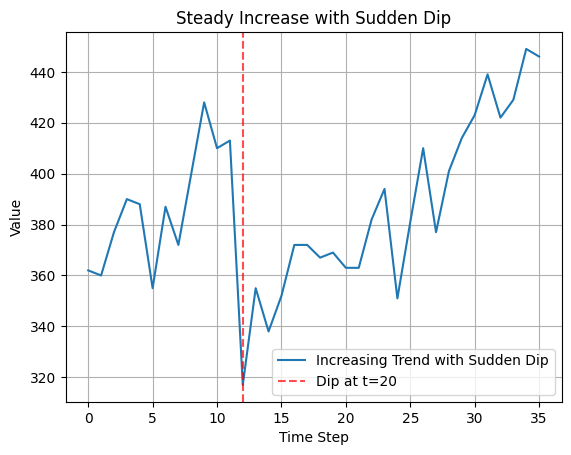

In [8]:
# Parameters
n_points = N_MONTHS
slope = 0.15
dip_time = 12
dip_magnitude = -80  # Negative for a dip
noise_std = 13.2

# Time vector
t = np.arange(n_points)

# Linear increasing trend
trend = slope * t + 12

# Sudden dip
dip = np.zeros(n_points)
dip[dip_time:] = dip_magnitude

# Add some Gaussian noise
noise = np.random.normal(0, noise_std, size=n_points)

# Final series
n_crabs1 = 30 * trend + noise + dip
n_crabs1 = n_crabs1.astype(int)

# Plot
plt.plot(t, n_crabs1, label='Increasing Trend with Sudden Dip')
plt.axvline(dip_time, color='red', linestyle='--', alpha=0.7, label='Dip at t=20')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.title('Steady Increase with Sudden Dip')
plt.show()

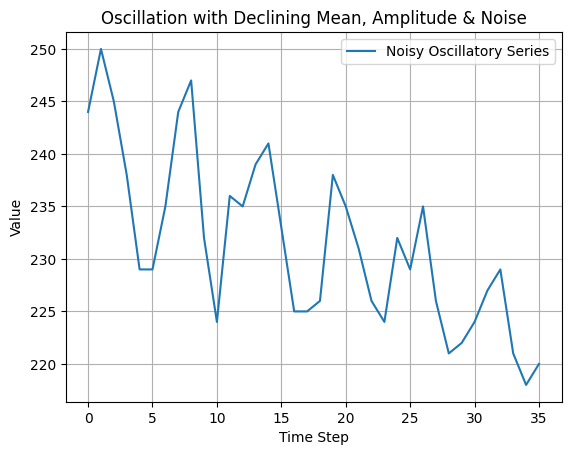

In [9]:
# Parameters
n_points = N_MONTHS
period = 6
initial_amplitude = 15
initial_mean = 240
decline_rate = 0.5
amplitude_decay_rate = 0.05
noise_std = 3.0

# Time vector
t = np.arange(n_points)

# Declining mean
mean_trend = initial_mean - decline_rate * t

# Changing amplitude over time
amplitude = initial_amplitude * np.exp(-amplitude_decay_rate * t)

# Oscillatory component with variable amplitude
oscillation = amplitude * np.sin(2 * np.pi * t / period)

# Add noise
noise = np.random.normal(0, noise_std, size=n_points)

# Final series
n_crabs2 = mean_trend + oscillation + noise
n_crabs2 = n_crabs2.astype(int)

# Plot
plt.plot(t, n_crabs2, label='Noisy Oscillatory Series')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.title('Oscillation with Declining Mean, Amplitude & Noise')
plt.show()

## Temp

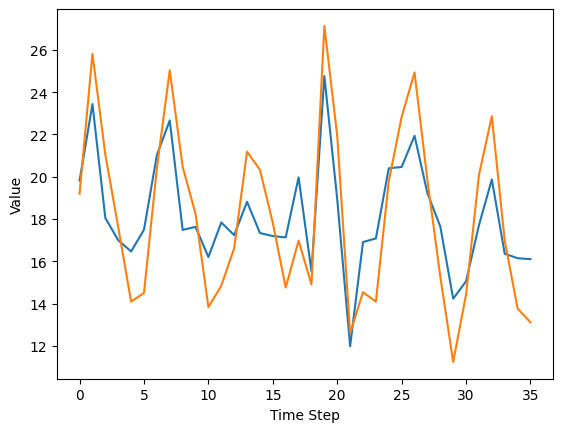

In [10]:
# Parameters
n_points = N_MONTHS
period = 6
amplitude1 = 2
amplitude2 = 5
initial_mean = 18
noise_std = 2.0

# Time vector
t = np.arange(n_points)

# Oscillatory component with variable amplitude
oscillation2 = amplitude2 * np.sin(2 * np.pi * t / period)
oscillation1 = amplitude1 * np.sin(2 * np.pi * t / period + np.pi / 10)  # Phase shift

# Add noise
noise = np.random.normal(0, noise_std, size=n_points)

# Final series
t1 = initial_mean + oscillation1 + noise
t2 = initial_mean + oscillation2 + noise

# Plot
plt.plot(t, t1, label='Noisy Oscillatory Series')
plt.plot(t, t2, label='Noisy Oscillatory Series')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.show()

In [11]:
texts = [
    "Crab moving quickly across rocks.",
    "Slow movement near seagrass patches.",
    "Claw waving directed at nearby crab.",
    "Burrowing into sandy sediment.",
    "Feeding on small mollusks.",
    "Climbing algae-covered rocks.",
    "Mating behavior with antenna touching.",
    "Resting under shell fragment.",
    "Retreating quickly from shadow.",
    "Cleaning claws with rubbing motion.",
    "Guarding a small hole in sediment.",
    "Sideways walking along bay edge.",
    "Territorial display against intruder.",
    "Camouflaging with surrounding mud.",
    "Foraging among seagrass roots.",
    "Interacting with small fish nearby.",
    "Escaping predator silhouette overhead.",
    "Claw snapping in competition.",
    "Inspecting discarded crab shell.",
    "Vibrating antennae in water currents.",
    "Moving toward bait.",
    "Struggling with entangled seaweed.",
    "Pausing frequently during exploration.",
    "Social contact with other crabs.",
    "Dragging shell fragment backward.",
    "Hiding under floating debris.",
    "Climbing onto submerged logs.",
    "Searching for food in tidal pools.",
    "Resting in shaded rock crevice.",
    "Swimming short distance to escape.",
    "Picking algae from rock surface.",
    "Hiding in sandy burrow.",
    "Climbing vertical rock face.",
    "Feeding on detritus in shallow water.",
    "Moving sideways along sandy bottom.",
    "Using claws to dig into sediment.",
    "Exploring new territory.",
    "Hiding under seagrass blades.",
    "Picking detritus from seabed.",
    "Defensive posture when approached.",
    "Climbing submerged rocks.",
    "Exchanging antenna taps.",
    "Scavenging near tidal pools.",
    "Rapid claw movement while feeding.",
    "Retreating into burrow.",
    "Emerging cautiously from hiding.",
    "Color changes during molting.",
    "Waving claws rhythmically.",
    "Half buried in sand.",
    "Searching for mates at twilight.",
    "Feeding on algae scraped from rocks.",
    "Sitting still blending with environment.",
    "Climbing barnacle-covered surfaces.",
    "Stillness in cold water.",
    "Rapid crossing of open sand.",
    "Interaction with hermit crabs.",
    "Picking biofilm on submerged wood.",
    "Escaping from aggressive fish.",
    "Guarding eggs under abdominal flap.",
    "Moving toward warmer water pockets.",
    "Climbing seaweed stalks.",
    "Shaking claws after contact.",
    "Displaying dominance by lifting body.",
    "Feeding on small crustaceans.",
    "Hiding beneath rocks.",
    "Moving in groups.",
    "Claw snapping at diver.",]

associated_species = [
    "Sea Star",
    "Hermit Crab",
    "Small Fish",
    "Snail",
    "Shrimp",
    "Barnacle",
    "Sea Anemone",
    "Sea Urchin",
    "Algae",
    "Polychaete Worm",
    "Mussel",
    "Coral Fragment",
    "Jellyfish",
    "Sea Sponge",
    "Crab (Other Species)",
]

## Species

In [12]:
def random_associated_species(species_list, min_items=1, max_items=5):
    n = random.randint(min_items, max_items)
    return random.sample(species_list, n)

In [13]:
species = ['A farensis', 'A. Farensis', 'U. olhanensis', 'u. olhanen.']
lst_sex = ['?', 'female', 'male or female', ' ', '-', np.nan, 'N/R', 'male']
lst_stage = ['juvenile', 'pre_puberty', 'sub_adult', 'adult']
lst_stage2 = ['j', 'p', 's', 'a']


sp1, sp2 = [], []
sex1, sex2 = [], []
stage1, stage2 = [], []
is_gravid1, is_gravid2 = [], []
id1, id2 = [], []
text1, text2 = [], []
ass_species1, ass_species2 = [], []

for i in range(N_MONTHS):
    ## pick a random from species n samples
    sp1.append(np.random.choice(species, size= n_crabs1[i], p=[0.25, 0.3, 0.2, 0.25]))
    sp2.append(np.random.choice(species, size= n_crabs2[i], p=[0.35, 0.35, 0.1, 0.2]))

    sex1.append(np.random.choice(lst_sex, size= n_crabs1[i], p=[0.05, 0.25, 0.05, 0.1, 0.01, 0.05, 0.01, 0.48]))
    sex2.append(np.random.choice(lst_sex, size= n_crabs2[i], p=[0.05, 0.25, 0.05, 0.1, 0.01, 0.05, 0.01, 0.48]))

    stage1.append(np.random.choice(lst_stage, size= n_crabs1[i], p=[0.2, 0.3, 0.3, 0.2]))
    stage2.append(np.random.choice(lst_stage2, size= n_crabs2[i], p=[0.1, 0.3, 0.4, 0.2]))
    is_gravid1.append(np.random.choice([True, False], size=n_crabs1[i], p=[0.2, 0.8]))
    is_gravid2.append(np.random.choice([True, False], size=n_crabs2[i], p=[0.2, 0.8]))
    id1.append(np.arange(1, n_crabs1[i] + 1))
    id2.append(np.arange(1, n_crabs2[i] + 1))

    text1.append(np.random.choice(texts, size=n_crabs1[i], replace=True))
    text2.append(np.random.choice(texts, size=n_crabs2[i], replace=True))

    lst = []
    for j in range(n_crabs1[i]):
        lst.append(random_associated_species(associated_species))

    ass_species1.append(lst)

    lst = []
    for j in range(n_crabs2[i]):
        lst.append(random_associated_species(associated_species))
    
    ass_species2.append(lst)

In [14]:
assert all(n == len_l1 == len_l2 for n, len_l1, len_l2 in zip(n_crabs1, [len(k) for k in ass_species1], [len(k) for k in id1])), "Mismatch in crab counts across lists"
assert all(n == len_l1 == len_l2 for n, len_l1, len_l2 in zip(n_crabs2, [len(k) for k in ass_species2], [len(k) for k in id2])), "Mismatch in crab counts across lists"

In [15]:
def generate_noisy_poisson(mu, cutoff=5, mult=6):
    """    Generate a noisy sample from a Poisson distribution, apply a linear transformation,
    and filter out values below a specified cutoff.
    """
    samples = poisson.rvs(mu=mu, size=1000)
    noise = np.random.normal(loc=0, scale=1.0, size=samples.shape)
    noisy_samples = mult*(samples + noise)
    # cut values less than X
    noisy_samples = noisy_samples[noisy_samples >= cutoff].astype(int)
    return noisy_samples


## cl: Generate the distribution
- cut the number of samples at n_crabsX

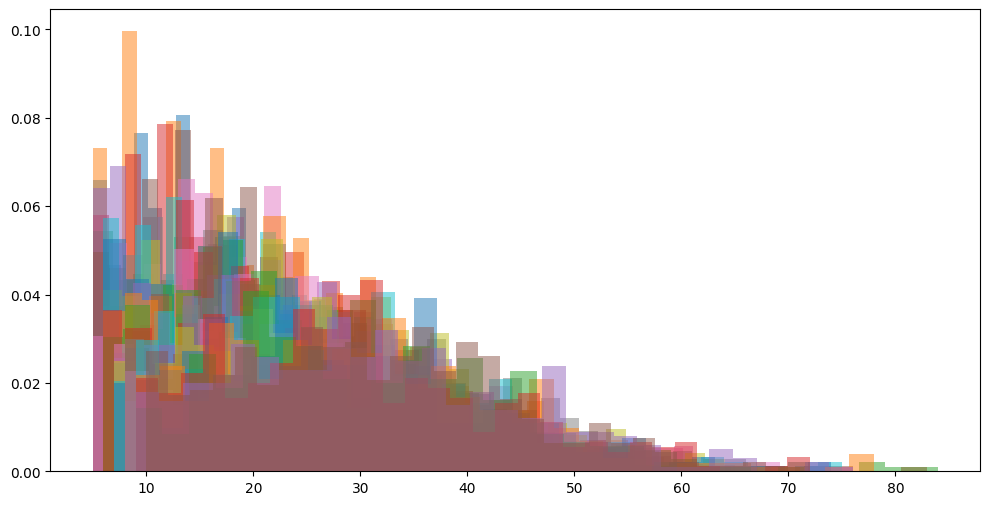

In [16]:
# generate tuple for cl poisson distributions
mus = np.linspace(2, 5, N_MONTHS)
cutoffs = np.linspace(5, 10, N_MONTHS)

fig, ax = plt.subplots(figsize=(12, 6))
cl1 = []
for i, mu in enumerate(mus):
    cl = generate_noisy_poisson(mu, cutoff=int(cutoffs[i]))
    cl1.append(cl[:n_crabs1[i]])


    plt.hist(cl1[i], bins=30, density=True, alpha=0.5, label='Noisy Samples')


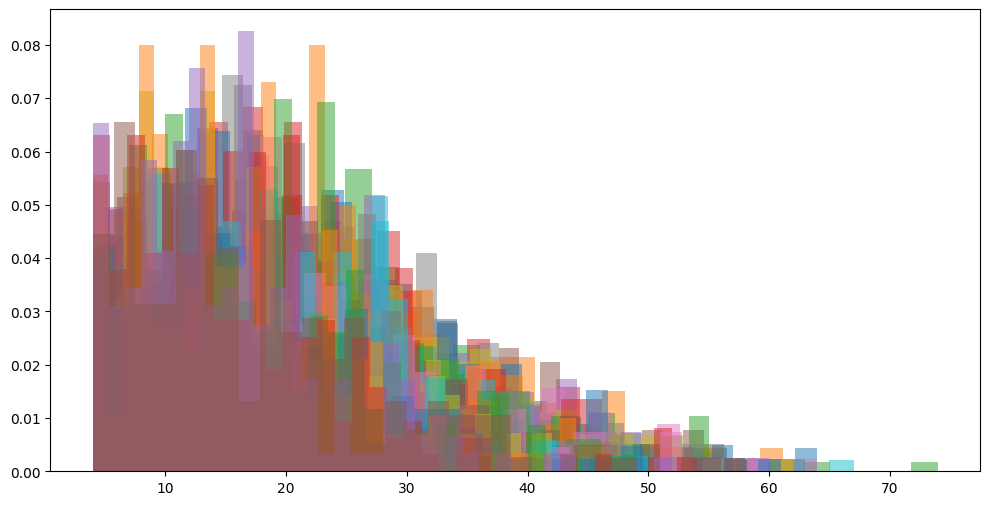

In [17]:
# generate tuple for cl poisson distributions
mus = np.linspace(4, 2, N_MONTHS)
cutoffs = np.linspace(8, 4, N_MONTHS)

fig, ax = plt.subplots(figsize=(12, 6))
cl2 = []
for i, mu in enumerate(mus):
    cl = generate_noisy_poisson(mu, cutoff=int(cutoffs[i]))
    cl2.append(cl[:n_crabs2[i]])


    plt.hist(cl2[i], bins=30, density=True, alpha=0.5, label='Noisy Samples')

## cw: generate correlated data
- slightly negative correlation for site 2

In [18]:
def generate_correlated_samples(series, correlation, mean, std):
    """Generate correlated samples using a multivariate normal distribution."""
    z = np.random.normal(0, 1, len(series))
    # Construct correlated series
    y = correlation * (series - series.mean()) / series.std() + np.sqrt(1 - correlation**2) * (z - z.mean()) / z.std()

    y = y * std + mean
    return y

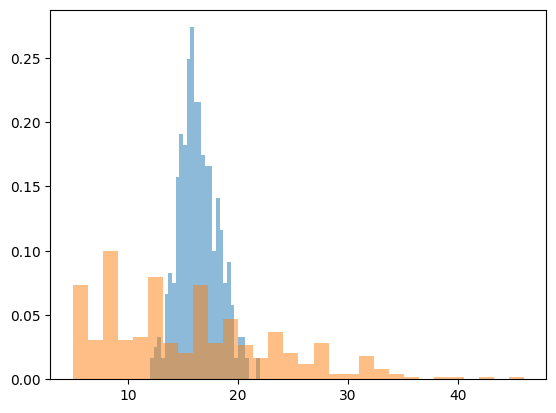

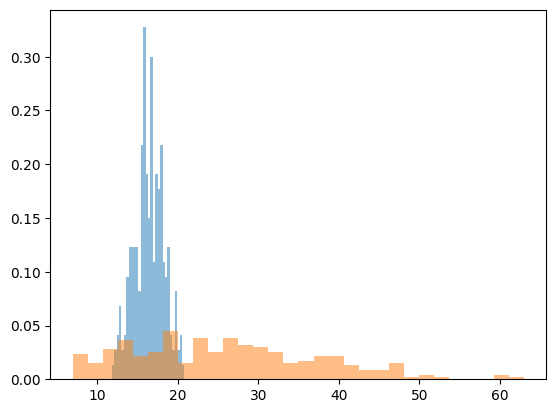

In [19]:
means = np.random.normal(15, 4, N_MONTHS)
stds = np.random.uniform(1, 3, N_MONTHS)

cw1, cw2 = [], []
for i in range(len(n_crabs1)):
    # Generate correlated samples for each crab count
    cw1.append(generate_correlated_samples(cl1[i], correlation=0.8, mean=means[i], std=stds[i]))
    cw2.append(generate_correlated_samples(cl2[i], correlation=-0.1, mean=means[i], std=stds[i]))

plt.hist(cw1[0], bins=30, density=True, alpha=0.5)
plt.hist(cl1[1], bins=30, density=True, alpha=0.5)
plt.show()

plt.hist(cw2[0], bins=30, density=True, alpha=0.5)
plt.hist(cl2[1], bins=30, density=True, alpha=0.5)
plt.show()

In [20]:
assert all(n == len_l1 == len_l2 for n, len_l1, len_l2 in zip(n_crabs1, [len(k) for k in cl1], [len(k) for k in cw1])), "Mismatch in crab counts across lists"

In [21]:
assert all(n == len_l1 == len_l2 for n, len_l1, len_l2 in zip(n_crabs2, [len(k) for k in cl2], [len(k) for k in cw2])), "Mismatch in crab counts across lists"

In [22]:
assert N_MONTHS == len(n_crabs1) == len(n_crabs2), "Mismatch in number of months and crab counts"

## lcl, rcl: Normally distributed values
- and correlated tightly for both sites

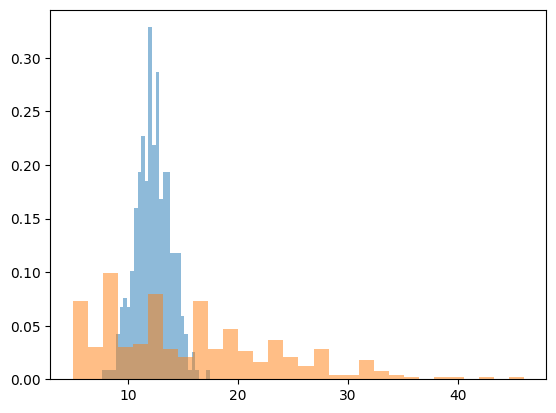

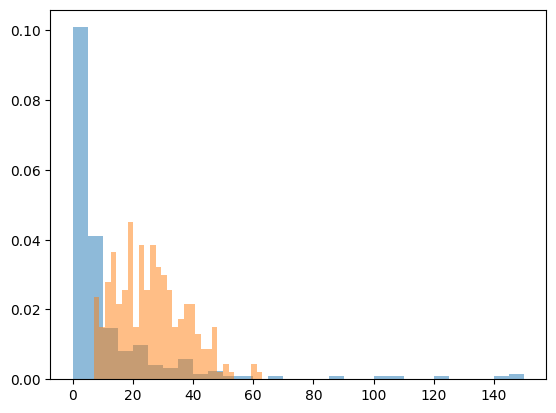

In [23]:
meansl = np.random.normal(8, 2, N_MONTHS)
meansr = np.random.normal(1.5, 1, N_MONTHS)
stds = np.random.uniform(1, 2, N_MONTHS)

lcl1, lcl2 = [], []
rcl1, rcl2 = [], []
for i in range(N_MONTHS):
    # Generate left-skewed samples
    lcl1.append(np.random.normal(loc=meansl[i], scale=stds[i], size=n_crabs1[i]))
    lcl2.append(np.random.normal(loc=meansl[i], scale=stds[i], size=n_crabs2[i]))

    # Generate right-skewed samples
    r1 = np.random.lognormal(mean=meansr[i], sigma=stds[i], size=n_crabs1[i])
    # cast all values greater than 200 to 150
    r1[r1 > 200] = 150
    rcl1.append(r1)

    r2 = np.random.lognormal(mean=meansr[i], sigma=stds[i], size=n_crabs2[i])
    # cast all values greater than 200 to 150
    r2[r2 > 200] = 150
    rcl2.append(r2)

plt.hist(lcl1[0], bins=30, density=True, alpha=0.5)
plt.hist(cl1[1], bins=30, density=True, alpha=0.5)
plt.show()

plt.hist(rcl2[0], bins=30, density=True, alpha=0.5)
plt.hist(cl2[1], bins=30, density=True, alpha=0.5)
plt.show()

## fw: poisson

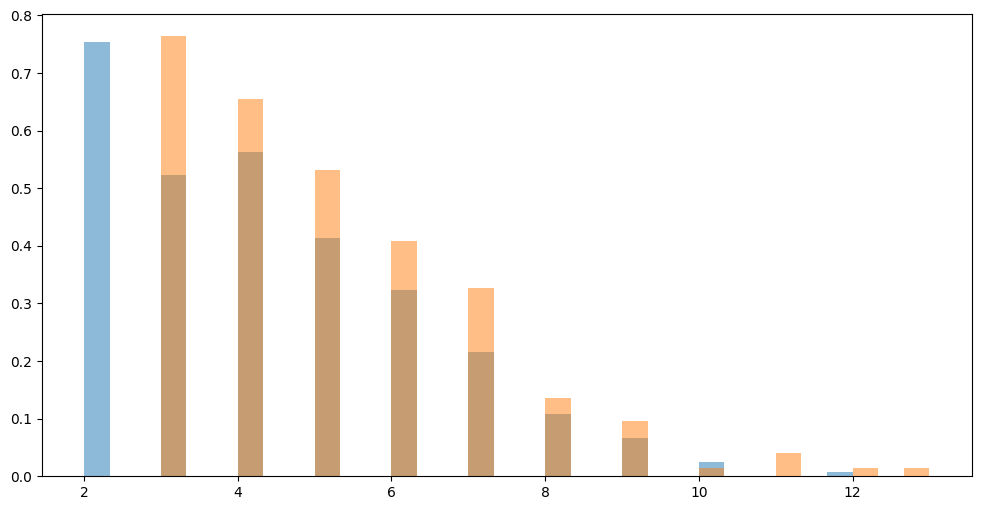

In [24]:
# generate tuple for fw poisson distributions
mus = np.linspace(2.3, 2.5, N_MONTHS)
cutoffs = np.linspace(2, 3.1, N_MONTHS)

fig, ax = plt.subplots(figsize=(12, 6))
fw1, fw2 = [], []
for i, mu in enumerate(mus):
    fw = generate_noisy_poisson(mu, cutoff=int(cutoffs[i]), mult=1.5)
    fw1.append(fw[:n_crabs1[i]])

    fw = generate_noisy_poisson(mu, cutoff=int(cutoffs[i]), mult=1.5)
    fw2.append(fw[:n_crabs2[i]])


plt.hist(fw1[0], bins=30, density=True, alpha=0.5)
plt.hist(fw2[-1], bins=30, density=True, alpha=0.5)
plt.show()

In [25]:
assert all(n == len_l1 == len_l2 for n, len_l1, len_l2 in zip(n_crabs1, [len(k) for k in lcl1], [len(k) for k in rcl1])), "Mismatch in crab counts across lists"
assert all(n == len_l1 == len_l2 for n, len_l1, len_l2 in zip(n_crabs2, [len(k) for k in lcl2], [len(k) for k in rcl2])), "Mismatch in crab counts across lists"

In [26]:
assert all(n == len_l1 == len_l2 for n, len_l1, len_l2 in zip(n_crabs1, [len(k) for k in fw1], [len(k) for k in rcl1])), "Mismatch in crab counts across lists"
assert all(n == len_l1 == len_l2 for n, len_l1, len_l2 in zip(n_crabs2, [len(k) for k in fw2], [len(k) for k in rcl2])), "Mismatch in crab counts across lists"

## Depth

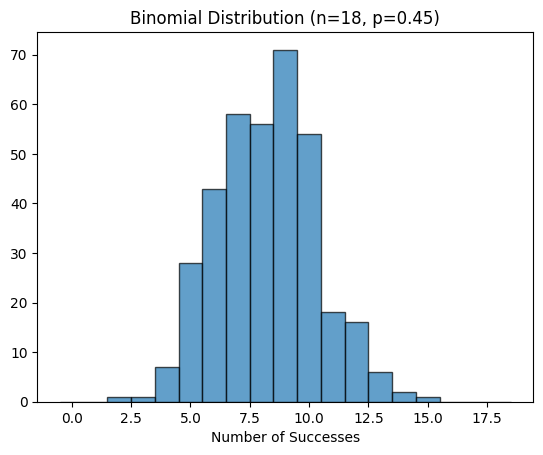

In [27]:
# Parameters
n_trials = 18      # number of trials per sample
p_success = 0.45   # probability of success
n_samples = 1000   # number of samples to generate

# Generate samples
dep1, dep2 = [], []
for i in range(N_MONTHS):
    # Generate binomial samples for each month
    dep1.append(binom.rvs(n=n_trials, p=p_success, size=n_crabs1[i]))
    dep2.append(binom.rvs(n=n_trials, p=p_success, size=n_crabs2[i]))


# Plot histogram
plt.hist(dep1[0], bins=range(n_trials+2), align='left', edgecolor='black', alpha=0.7)
plt.title(f'Binomial Distribution (n={n_trials}, p={p_success})')
plt.xlabel('Number of Successes')
plt.show()

## Putting everthing together

In [28]:
# cl	lcl	fw	species	longitude	is_gravid	rcl	stage	sex	id	cw	latitude

for i in range(N_MONTHS):
    # empty df with named columns
    df = pd.DataFrame({
        'cl [cm]': cl1[i],
        'lcl [cm]': lcl1[i],
        'fw [cm]': fw1[i],
        'species': sp1[i],
        'longitude': None,
        'is_gravid': is_gravid1[i],
        'rcl [cm]': rcl1[i],
        'stage': stage1[i],
        'sex': sex1[i],
        'id': id1[i],
        'cw [cm]': cw1[i],
        'latitude': None,
        'associated_species': ass_species1[i],
        'depth [m]': dep1[i],
        'stage': stage1[i],
        'is_gravid': is_gravid1[i],
        'behaviour': text1[i]
    })
    df.loc[0, 'latitude'] = LAT1
    df.loc[0, 'longitude'] = LONG1
    filename = f'{str(random_dates[i].date())}_rf.csv'

    # hide few nonsense values
    df.loc['rcl [cm]', random.randint(0, 150)] = -999
    df.loc['rcl [cm]', random.randint(0, 150)] = -999
    df.loc['rcl [cm]', random.randint(0, 150)] = -999
    # save df
    df.to_csv(filename)
    
    df = pd.DataFrame({
        'cl [mm]': cl2[i]*10,
        'lcl [mm]': lcl2[i]*10,
        'fw [mm]': fw2[i]*10,
        'species_name': sp2[i],
        'longitude': None,
        'is_gravid': is_gravid2[i],
        'rcl [mm]': rcl2[i]*10,
        'stage': stage2[i],
        'sex': sex2[i],
        'id': id2[i],
        'cw [mm]': cw2[i]*10,
        'latitude': None,
        'associated_species': ass_species2[i],
        'depth [m]': dep2[i],
        'stage': stage2[i],
        'is_gravid?': is_gravid2[i],
        'behavior': text2[i]
    })
    df.loc[0, 'latitude'] = LAT2
    df.loc[0, 'longitude'] = LONG2
    filename = f'{str(random_dates[i].date())}_ra.csv'
    # save df
    df.to_csv(filename)